# Illustration: Hollow plate RVE 
## Problem definition
In this part, we are trying to show how the developed RVE simulator works by a simple RVE case called hollow plate RVE. 

> The shematic of the RVE is given by 

<center><img src="illustration.png" width="300"></center>

<center> Fig.schematics of the hollow plate RVE  </center>

<br />

> **Geometry parameters to describe the RVE**
1. length: $L$, width: $W$. Usually, $L=W$; therefore, we only use one parameter (size) to define the shape of RVE 
2. radius: $R$, which is the radius of the plate inside the square 

> **Other parameters for simulation** 
1. Material parameters: 
- Young;s modulus, the default value is $100 \mathrm{Mpa}$
- Poission ratio , the default value is $0.3$ 

2. Loading: 
- $ [ E_{xx}, E_{yy}, E_{xy} ]$ 

3. Mesh:
- mesh portion: divisions of every edges when meshing 

# Realization

In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
folder_path = "/home/jiaxiangyi/Documents/yaga_phd"
sys.path.insert(0, folder_path)
folder_path = "/home/jiaxiangyi/Documents/abaqusrve"
sys.path.insert(0, folder_path)

import yaga_phd

import abaqusrve
from yaga_phd.design_of_experiment.samplers import RandomSampler
from abaqusrve.cases.hollow_plate_rve import NaiveHollowPlate


In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"radius": [0.10, 0.40], "size": [1.0, 1.5]})
# define number of samples
num_points = 3
# define the information of outputs
name_outputs = ["strain", "stress"]
doe_sampler = RandomSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
samples = doe_sampler.samples
responses = doe_sampler.responses
print(doe_sampler.samples)
print(doe_sampler.responses)


samples_dict = doe_sampler.samples.to_dict("records")

     radius      size
0  0.138091  1.483359
1  0.178143  1.448618
2  0.213025  1.168111
  strain stress
0    NaN    NaN
1    NaN    NaN
2    NaN    NaN


In [3]:
# initialize the simulator 
simulator = NaiveHollowPlate()
simulator.update_sim_info(strain=[0.05, 0.05, 0.05], print_info=True)

Simulation information: 

{
    "job_name": "hollowplate",
    "radius": 0.2,
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "mesh_portion": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "num_cpu": 1,
    "platform": "ubuntu"
}


In [4]:
# calculate the initial responses of simulation
for ii in range(len(samples_dict)):
    results = simulator.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )
    # update DoE information
    for jj in range(len(list(responses.keys()))):
        responses.at[ii, list(responses.keys())[jj]] = results[
            list(responses.keys())[jj]
        ]

/home/jiaxiangyi/Documents/abaqusrve/examples/hollow_plate_simulation/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.005012 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/abaqusrve/examples/hollow_plate_simulation/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.004050 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/abaqusrve/examples/hollow_plate_simulation/Data/case_2
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.005093 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


Text(0.5, 0.98, 'simulation results')

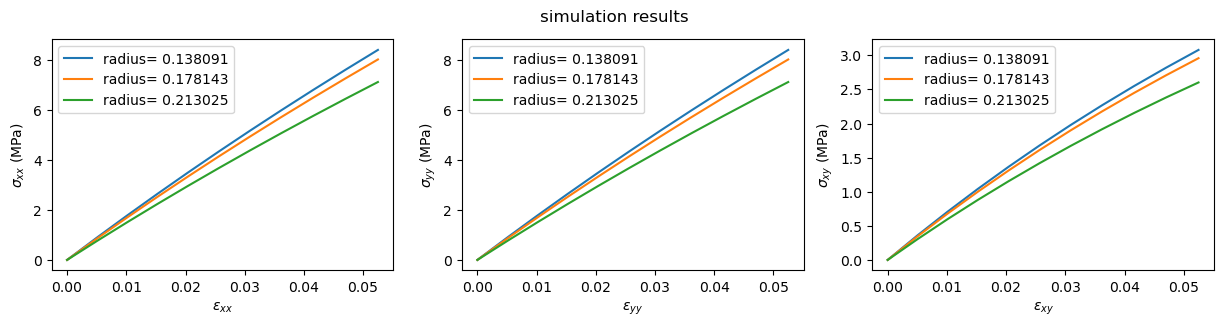

In [5]:


fig, ax = plt.subplots(1, 3, figsize=(15, 3))
pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
ax[0].plot(
    responses["strain"][0][:, 0, 0],
    responses["stress"][0][:, 0, 0],
    label=f'radius= {samples["radius"][0]:3f}',
)
ax[0].plot(
    responses["strain"][1][:, 0, 0],
    responses["stress"][1][:, 0, 0],
    label=f'radius= {samples["radius"][1]:3f}',
)
ax[0].plot(
    responses["strain"][2][:, 0, 0],
    responses["stress"][2][:, 0, 0],
    label=f'radius= {samples["radius"][2]:3f}',
)
ax[0].legend()
ax[0].set(**pparam)

pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
ax[1].plot(
    responses["strain"][0][:, 1, 1],
    responses["stress"][0][:, 1, 1],
    label=f'radius= {samples["radius"][0]:3f}',
)
ax[1].plot(
    responses["strain"][1][:, 1, 1],
    responses["stress"][1][:, 1, 1],
    label=f'radius= {samples["radius"][1]:3f}',
)
ax[1].plot(
    responses["strain"][2][:, 1, 1],
    responses["stress"][2][:, 1, 1],
    label=f'radius= {samples["radius"][2]:3f}',
)
ax[1].legend()
ax[1].set(**pparam)

pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
ax[2].plot(
    responses["strain"][0][:, 1, 0],
    responses["stress"][0][:, 1, 0],
    label=f'radius= {samples["radius"][0]:2f}',
)
ax[2].plot(
    responses["strain"][1][:, 1, 0],
    responses["stress"][1][:, 1, 0],
    label=f'radius= {samples["radius"][1]:2f}',
)
ax[2].plot(
    responses["strain"][2][:, 1, 0],
    responses["stress"][2][:, 1, 0],
    label=f'radius= {samples["radius"][2]:2f}',
)
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('simulation results')